In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook'])

### Produção de Pares

função phi_xi

(2.51188643150958, 10000.0)

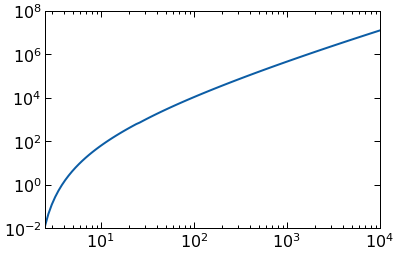

In [3]:
data = np.genfromtxt('outputs/phi_xi.txt', names = True)

plt.loglog(data['xi'], data['phi_xi'])
plt.ylim(1e-2, 1e8)
plt.xlim(10**(0.4), 1e4)

Função $f(\nu)$ que envolve a integração de $\phi$.

(0.001, 100.0)

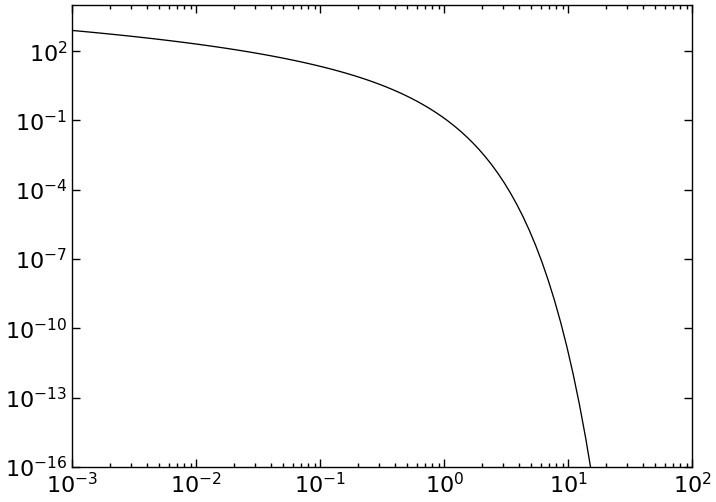

In [46]:

plt.xscale('log')
plt.yscale('log')

data = np.genfromtxt('outputs/f_nu.txt', names = True)



plt.plot(data['nu'], data['f_nu'], color = "black", lw = 0.95)

plt.ylim(1e-16, 1e4)
plt.xlim(1e-3, 1e2)



### Taxas de variação

(1e+18, 1e+22)

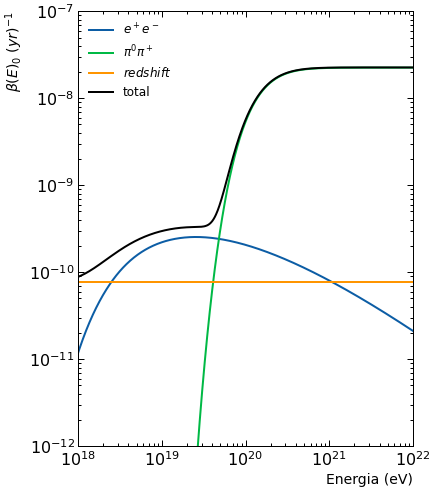

In [5]:
data = np.genfromtxt('outputs/beta_E.txt', names = True)

plt.figure(figsize=(6,8))


plt.xlabel("Energia (eV)", loc = "right", fontsize = 14)
plt.ylabel("$\\beta(E)_0$ $(yr)^{-1}$", loc = "top", fontsize = 14)

plt.yscale('log')
plt.xscale('log')


plt.plot(data['E'], data['beta_pair_E'], label = "$e^+ e^-$")
plt.plot(data['E'], data['beta_pion_E'], label = "$\pi^0\pi^+$")
plt.plot(data['E'], data['beta_rsh_E'], label = "$redshift$")
plt.plot(data['E'], data['beta_total_E'], color = "black", label = "total")

plt.legend(fontsize = 12)

plt.ylim(1e-12, 1e-7)
plt.xlim(1e18, 1e22)

(1e+18, 1e+22)

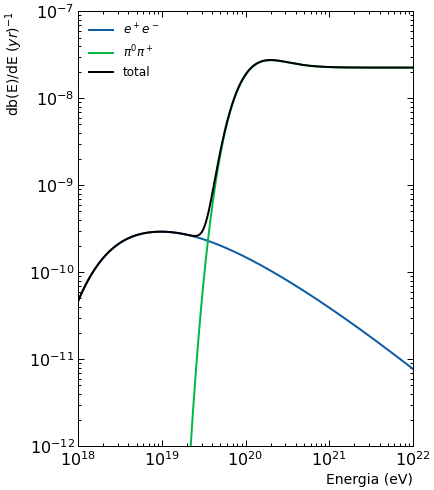

In [4]:
data = np.genfromtxt('outputs/dbeta_dE_E.txt', names = True)

plt.figure(figsize=(6,8))

plt.xlabel("Energia (eV)", loc = "right", fontsize = 14)
plt.ylabel("db(E)/dE $(yr)^{-1}$", loc = "top", fontsize = 14)

plt.yscale('log')
plt.xscale('log')

plt.plot(data['E'], data['db0_pair_dE'], label = "$e^+ e^-$")
plt.plot(data['E'], data['db0_pion_dE'], label = "$\pi^0\pi^+$")
plt.plot(data['E'], data['db0_dE'], color = "black", label = "total")

plt.legend(fontsize = 12)

plt.ylim(1e-12, 1e-7)
plt.xlim(1e18, 1e22)

6.641161939379365e+17
2.727574106724221e+18
7.002416468293565e+18
7.258843781279734e+18
2.88018e+19


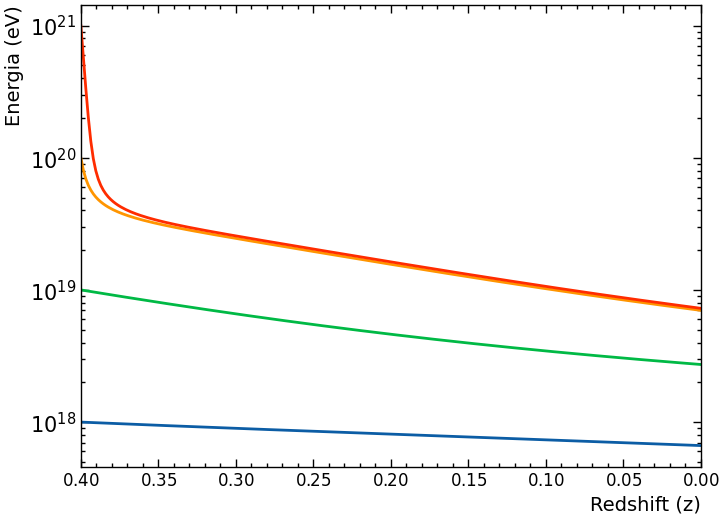

In [15]:
plt.figure(figsize=(8, 6))

plt.yscale('log')

plt.xlim(0.4, 0)

plt.xlabel("Redshift (z)", loc = "right", fontsize = 14)
plt.ylabel("Energia (eV)", loc = "top", fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

for i in range(1, 5, 1):
    
    data = np.genfromtxt(f"outputs/one_particle_propagation/E_t_{i}.txt", names = True)
    plt.plot(data['z'], data['E'])

    print(data['E'][-1])

plt.savefig("figures/energy_redshift.png", facecolor = "white", transparent = False)

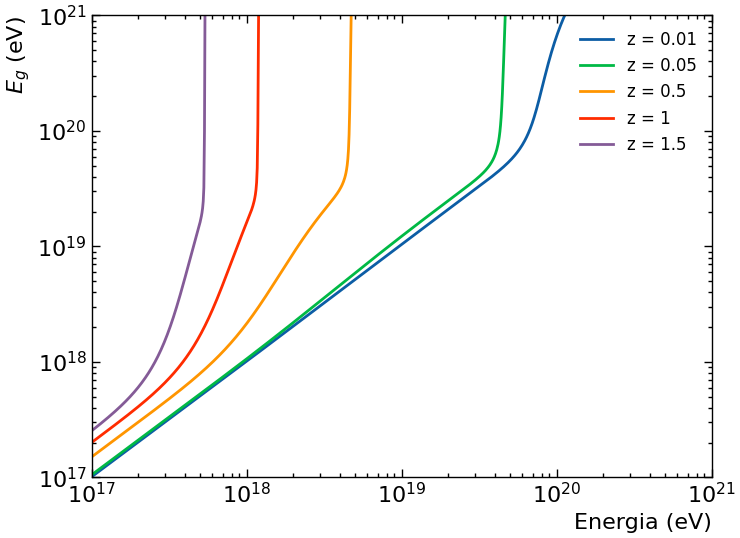

In [76]:
z_srcs = [0.01, 0.05, 0.5, 1, 1.5]

plt.figure(figsize=(8,6))

plt.yscale('log')
plt.xscale('log')

plt.xlabel("Energia (eV)", loc = 'right')
plt.ylabel("$E_g$ (eV)", loc = 'top')

plt.ylim(1e17, 1e21)
plt.xlim(1e17, 1e21)

for i in range(1, 6, 1):
    
    data = np.genfromtxt(f"outputs/generation_energy/E_g_{i}.txt", names = True)
    plt.plot(data['E'], data['Eg'], label = "z = " + str(z_srcs[i - 1]))

plt.legend(fontsize = 12)

plt.savefig("figures/E_g.png", facecolor = "white", transparent = False)

Text(0, 0.5, '$\\frac{dE_g}{dE}(E)$')

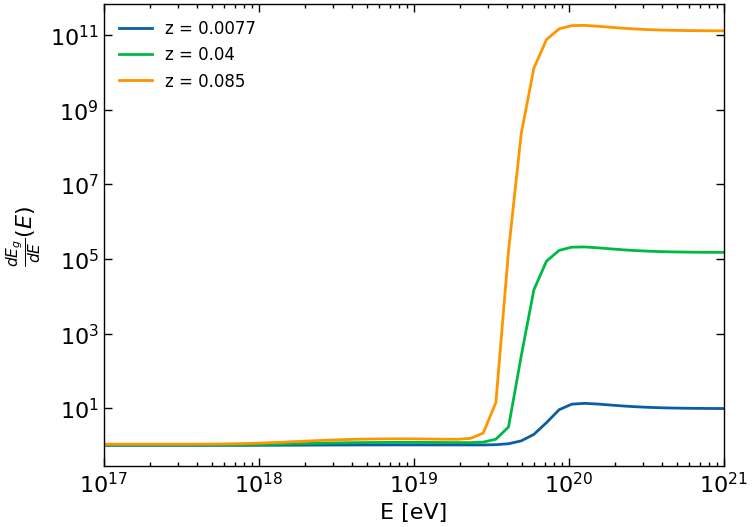

In [73]:
z_srcs = [7.7E-3, 0.04, 8.5e-2]

plt.figure(figsize=(8,6))

plt.yscale('log')
plt.xscale('log')

plt.xlim(1e17, 1e21)

for i in range(1, 4, 1):

    data = np.genfromtxt(f"outputs/energy_connection/dEsrc_dE_{i}.txt", names = True)
    plt.plot(data['E'], data['dEsrc_dE'], label = "z = " + str(z_srcs[i - 1]))

plt.legend(fontsize = 12)

plt.xlabel("E [eV]")
plt.ylabel("$\\frac{dE_g}{dE}(E)$")

## Fator de modificação

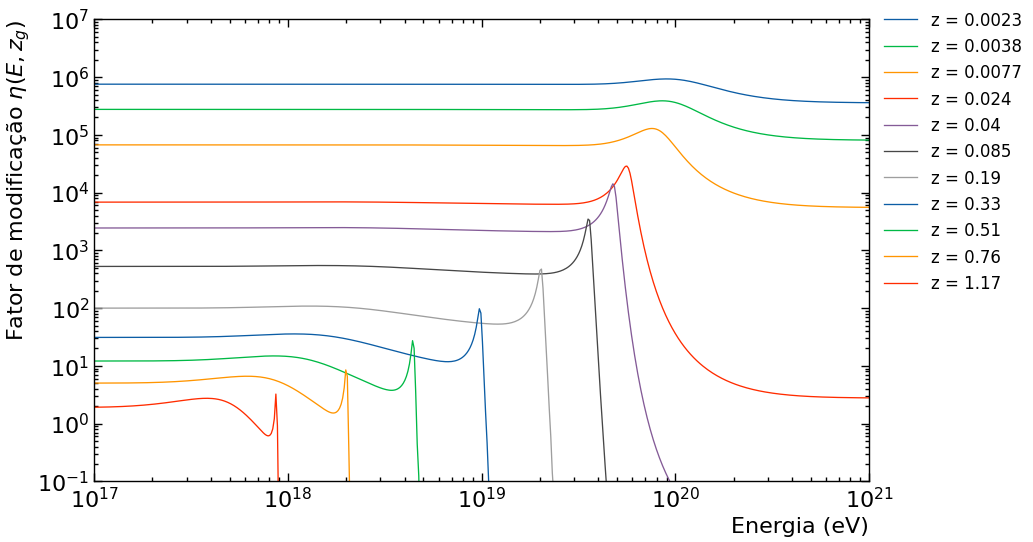

In [26]:
z_srcs = [2.3e-3, 3.8e-3, 7.7e-3, 2.4e-2, 4e-2, 8.5e-2, 0.19, 0.33, 0.51, 0.76, 1.17]

plt.figure(figsize=(10,6))

plt.yscale('log')
plt.xscale('log')

for i in range(1, 12, 1):
    
    data = np.genfromtxt(f"outputs/modification_factor/mod_factor_E_{i}.txt", names = True)
    plt.plot(data['E'], data['mod_factor'], label = "z = " + str(z_srcs[i - 1]), lw = 0.95)
    

plt.ylim(1e-1, 1e7)
plt.xlim(1e17, 1e21)

plt.ylabel("Fator de modificação $\\eta(E, z_{g}$)", loc = "top")
plt.xlabel("Energia (eV)", loc = "right")

plt.legend(fontsize = 12, bbox_to_anchor=(1, 1.05), loc='upper left')

plt.savefig("figures/modification_factor.png", facecolor = "white", transparent = False)

## Fluxo de prótons

Com o fator de modificação, tendo em vista o fluxo para uma fonte a $z_g$ do tipo

$$
j(E) = \frac{H_0^2}{16 \pi c^2} \gamma(\gamma - 1)L_pE^{-(\gamma + 1)}\eta(E, z_g)
$$

normalizando para $j(E = 1E17)$ temos

$$
j(E) =\left(\frac{E}{10^{17} eV}\right)^{-(\gamma + 1)}\frac{\eta(E, z_g)}{\eta(10^{17}, z_g)}
$$

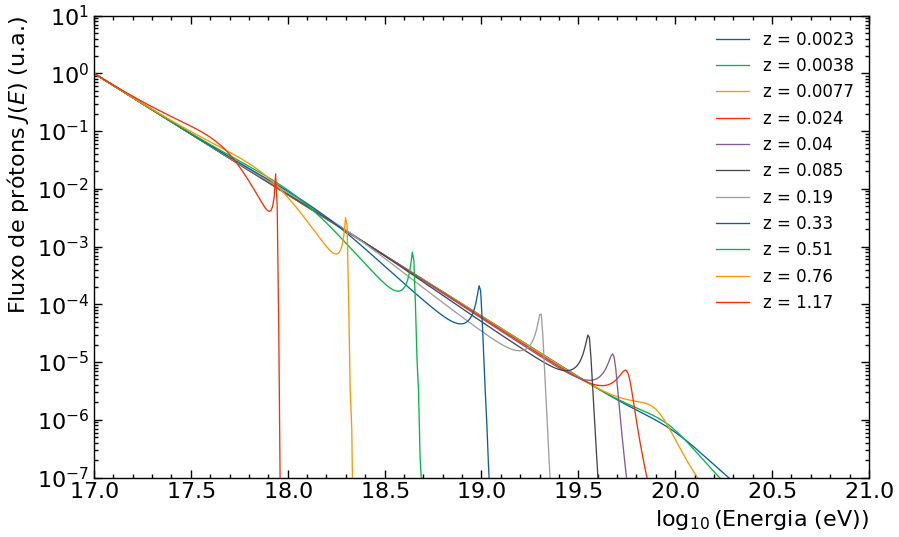

In [70]:
z_srcs = [2.3e-3, 3.8e-3, 7.7e-3, 2.4e-2, 4e-2, 8.5e-2, 0.19, 0.33, 0.51, 0.76, 1.17]

plt.figure(figsize=(10,6))

plt.yscale('log')
#plt.xscale('log')

for i in range(1, 12, 1):
    
    data = np.genfromtxt(f"outputs/modification_factor/mod_factor_E_{i}.txt", names = True)

    J = data['E']**-(1.1 + 1) *  data['mod_factor'] 
    J /= J[0]
    plt.plot(np.log10(data['E']), J , label = "z = " + str(z_srcs[i - 1]), lw = 0.95)
    

plt.ylim(1e-7, 1e1)
#plt.xlim(1e17, 1e21)
plt.xlim(17, 21)
plt.ylabel("Fluxo de prótons $J(E)$ (u.a.)", loc = "top")
plt.xlabel("$\\log_{10}( $Energia (eV)$ )$", loc = "right")

plt.legend(fontsize = 12)

plt.savefig("figures/proton_flux.png", facecolor = "white", transparent = False)

# Generalizando para muitas fontes

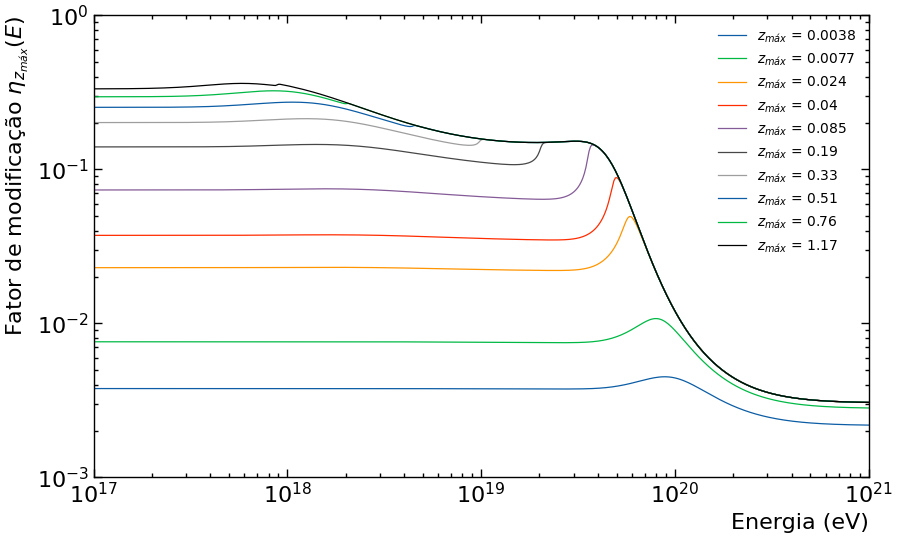

In [79]:
z_srcs = [3.8e-3, 7.7e-3, 2.4e-2, 4e-2, 8.5e-2, 0.19, 0.33, 0.51, 0.76, 1.17]

plt.figure(figsize=(10,6))


previous_mod_factor_ms = np.zeros(500)

for i in range(1, 10, 1):
    
    data = np.genfromtxt(f"outputs/mod_factor_ms/mod_factor_ms_E_{i}.txt", names = True, skip_header = 1)
    plt.plot(data['E'], data['mod_factor_ms'] + previous_mod_factor_ms, label = "$z_{máx}$ = " + str(z_srcs[i - 1]), lw = 0.9)

    previous_mod_factor_ms += data['mod_factor_ms']

data = np.genfromtxt(f"outputs/mod_factor_ms/mod_factor_ms_E_10.txt", names = True, skip_header = 1)
plt.plot(data['E'], data['mod_factor_ms'] + previous_mod_factor_ms, label = "$z_{máx}$ = " + str(z_srcs[10 - 1]), lw = 0.9, color = 'black')

    
plt.yscale('log')
plt.xscale('log')

plt.ylim(1e-3, 1e0)
plt.xlim(1e17, 1e21)

plt.ylabel("Fator de modificação $\\eta_{z_{máx}}(E)$", loc = "top")
plt.xlabel("Energia (eV)", loc = "right")

plt.legend(fontsize = 10)

plt.savefig("figures/mod_factor_sources.png", facecolor = "white", transparent = False)
